# Выбор локации для скважины

Привет! Меня зовут Антон, и я буду совсем не против общения на "ты".
Хочу заранее поблагодарить за проверку работы. Я сторонник лаконичности и красивого кода :) Конечно, реализую это в меру своих способностей :)
Буду очень благодарен за наводки, советы, какие-то рассказы из своего опыта!


Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 
from scipy import stats as st 

In [2]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

dfs = [df0, df1, df2]

In [3]:
df0.corr().iloc[-1]

f0         0.143536
f1        -0.192356
f2         0.483663
product    1.000000
Name: product, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
=*=*=*=*=*=*=*=*=*=*
          id        f0        f1        f2    product
10501  QlXPj -0.773416  0.624082  1.079618  25.722552
40707  Nybd2 -0.086190  0.953241 -1.905766   8.573203
=*=*=*=*=*=*=*=*=*=*
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -

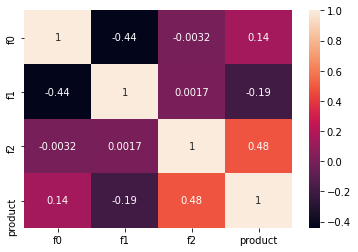

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
=*=*=*=*=*=*=*=*=*=*
          id        f0         f1        f2    product
95136  Ks9rv -7.800490  -3.719361  2.000509  57.085625
3612   gjDr9 -7.979947 -12.786267  1.003335  30.132364
=*=*=*=*=*=*=*=*=*=*
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min      

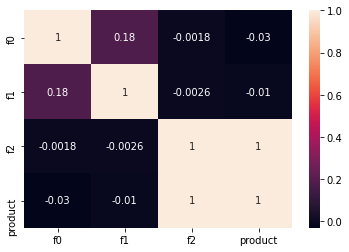

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
=*=*=*=*=*=*=*=*=*=*
          id        f0        f1        f2    product
67544  glIDp -0.759761 -0.113697  1.788634  21.072034
60065  KvqHJ  1.195022  0.787031  3.680542  98.889740
=*=*=*=*=*=*=*=*=*=*
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -

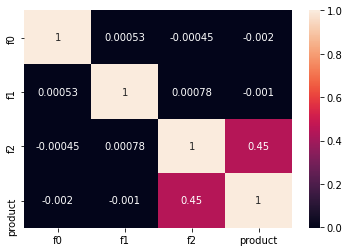

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*


In [4]:
for df in dfs:
    print(df.info())
    print('=*'*10)
    print(df.sample(2))
    print('=*'*10)
    print(df.describe())
    print('=*'*10)
    sns.heatmap(df.corr(), annot=True)
    plt.show()
    print('=*'*40)

Похоже, что признаки уже отмасштабированы. Категориальных признаков нет (id мы удалим ниже, для обучения модели он не нужен). Во втором регионе имеем полную зависимость целевой переменной от признака f2.

## Обучение и проверка модели

Функция, которая будет считать RMSE и выводить среднее предсказанное значение. Также в агрументах функции имеется возможность указать значения для удаления коррелирующих значений и применения масштабирования признаков. Как показали проверки ниже - это лишнее.

In [5]:
RS=123

In [6]:
def do_lr(df, drop_col=None, scaler=None): # Do Logistic Regression for df
    
    df = df.drop('id', axis=1)
   
    if drop_col:
        print('dropped', drop_col)
        df = df.drop(drop_col, axis=1)
    X = df.drop('product', axis=1)
    y = df['product']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RS)
    
    if scaler:
        print("do scalling")
        #Creating Scaler Object
        scaler_ = scaler
        X_train = scaler_.fit_transform(X_train)
        X_test = scaler_.transform(X_test)
        
    model = LinearRegression() 
    model.fit(X_train, y_train) 
    pred_test = pd.Series(model.predict(X_test)) 
    rmse = mean_squared_error(y_test, pred_test)**0.5 
    mean_pred_test = pred_test.mean()
    pred_all =  pd.Series(model.predict(X)) # чтобы сделать предсказания на всех данных и выбрать лучшие 200, нужно потом
    
    return  (rmse, mean_pred_test, pred_test, pred_all, y)   #2: добавим возвращаемое значение y


def get_resume(args):
    
    print('Значение RMSE:', args[0])
    print('Среднее предсказанное значение:', args[1])

In [7]:
# Сохраним результаты обучения без предобработки данных
lr_0 = do_lr(df0)
lr_1 = do_lr(df1)
lr_2 = do_lr(df2)
lrs = [lr_0, lr_1, lr_2]

In [8]:
get_resume(lr_0) 

Значение RMSE: 37.64786282376177
Среднее предсказанное значение: 92.54936189116306


Варьируем параметры входных данных:

In [9]:
get_resume(do_lr(df0, scaler=RobustScaler())) # применим RobustScaler (https://machinelearningknowledge.ai/sklearn-feature-scaling-with-standardscaler-minmaxscaler-robustscaler-and-maxabsscaler/#Robust-Scaler)

do scalling
Значение RMSE: 37.64786282376177
Среднее предсказанное значение: 92.54936189116306


Эффекта от применения скалера нет.

In [10]:
get_resume(do_lr(df0, drop_col=['f1'])) # удалим коррелирующий признак

dropped ['f1']
Значение RMSE: 38.196765022130705
Среднее предсказанное значение: 92.50644418479048


Результат: удаление одного из признаков, который имеет обратную умеренную зависимость дает отрицательный эффект.  
Модель работает неплохо и без лишних манипуляций с данными, соотвественно, не будем это использовать.
Строим предсказания для трех регионов и анализируем результат:

In [11]:
for n, df in enumerate(dfs):
    print(f'Регион №{n+1}: ')
    get_resume(do_lr(df))
    print('Реальное среднее:', df['product'].mean())
    print()

Регион №1: 
Значение RMSE: 37.64786282376177
Среднее предсказанное значение: 92.54936189116306
Реальное среднее: 92.50000000000001

Регион №2: 
Значение RMSE: 0.8954139804944313
Среднее предсказанное значение: 69.28001860653976
Реальное среднее: 68.82500000000002

Регион №3: 
Значение RMSE: 40.12803006598514
Среднее предсказанное значение: 95.09859933591373
Реальное среднее: 95.00000000000004



Вывод: среднее значение предсказано весьма точно, показатель RMSE в 1 и 3 регионе достаточно высок и почти одинаков, а во втором регионе за счет полной корреляции признака f2 - минимален, модель будет очень точно предсказывать данные.

## Подготовка к расчёту прибыли

In [12]:
search_points = 500 # При разведке региона исследуют 500 точек
best_points = 200 #  с помощью машинного обучения выбирают 200 лучших для разработки
budget = 10000 #(в млн руб) Бюджет на разработку скважин в регионе — 10 млрд рублей.
income_1000b = 0.45 #(в млн руб) Доход с каждой единицы продукта составляет 450 тыс. рублей
prob_loss = 0.025 #вероятность убытков меньше 2.5%

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины:

In [13]:
non_minuse_dev = budget / best_points / income_1000b
non_minuse_dev

111.11111111111111

Сравнивая данный объем со средними запасами в регионах можно сделать вывод, что все три региона  не имеют средние показатели выше этого порога. То есть, если случайным образом вести разработку скважин, скорее всего они окажутся убыточными.

## Расчёт прибыли и рисков 


In [14]:
def get_best_income(lr, to_print=0, region_n=None):
    best_income = lr[3].sort_values(ascending=False).head(best_points).sum() * income_1000b - budget
    if to_print:
        print(f'Прогнозируемая прибыль (млн) с лучших {best_points} скважин в регионе №{region_n+1}: ')
        print(best_income) 
    return best_income

In [15]:
for n, lr in enumerate(lrs):
    get_best_income(lr, to_print=1, region_n=n)

Прогнозируемая прибыль (млн) с лучших 200 скважин в регионе №1: 
4678.58361482675
Прогнозируемая прибыль (млн) с лучших 200 скважин в регионе №2: 
2524.90649073436
Прогнозируемая прибыль (млн) с лучших 200 скважин в регионе №3: 
4138.6421333428225


Вывод: по лучшим скважинам прибыль очень высокая. Но тут надо учитывать, что выбор происходит  лучших 200 точек не из 500 точек, как в условиях поиска, а из всего датасета с информацией о  100000 точках.

In [16]:
def get_distr_income(lr, n_samples=1000, n=search_points):
    rs = np.random.RandomState(RS)
    pred_reg = lr[3]
    y = lr[4] # истинное значение запасов
    distr = [] # distribution of best_samle_true_income
        
    for i in range(n_samples):
        sample = pred_reg.sample(n=n, replace=True, random_state=rs)
        # 2 исправляем логику расчета 
        # best_sample_income =  sample.sort_values(ascending=False).head(best_points).sum() * income_1000b - budget
        best_sample_indexes = sample.sort_values(ascending=False).head(best_points).index #2
        best_samle_true_income = y[best_sample_indexes].sum() * income_1000b - budget #2
        distr.append(best_samle_true_income.mean())
    return distr

def get_resume_distr_income(distr:list, region_n=''):
    risk = round(sum([i<0 for i in distr])/len(distr), 4) #Исправлено: поправил сравнение и сделал округление более точным
    distr = pd.Series(distr)
    print(f"Результаты bootstrap-выборки в регионе {region_n+1}")
    print("-"*40)
    print(f"График распределения прибыли:")
    distr.plot(kind='hist', bins=100)
    plt.show()
    mean_distr = round(distr.mean(), 3)
    low = round(distr.quantile(0.025), 2)
    up = round(distr.quantile(0.975), 2)
    print(f"Средняя прибыль: {mean_distr}")
    print(f"95% доверительный интервал: от {low} до {up}")
    #print(f"Риск убытков: {risk*100}%")
    
    if risk < prob_loss:
        print(f"Вероятность убытков равна {risk*100}% и является меньше допустимой. Регион подходит!")
    else:
        print(f"Вероятность убытков равна {risk*100}% и является больше допустимой. Регион стоит исключить из разработки.")   
    print("*="*40)
    print()


Результаты bootstrap-выборки в регионе 1
----------------------------------------
График распределения прибыли:


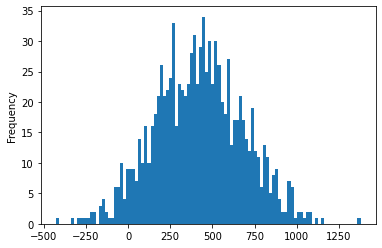

Средняя прибыль: 420.618
95% доверительный интервал: от -68.35 до 945.86
Вероятность убытков равна 5.3% и является больше допустимой. Регион стоит исключить из разработки.
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Результаты bootstrap-выборки в регионе 2
----------------------------------------
График распределения прибыли:


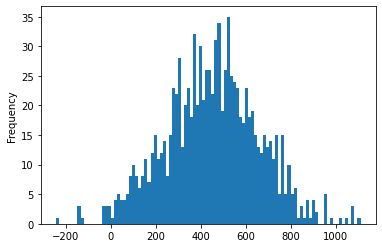

Средняя прибыль: 452.222
95% доверительный интервал: от 42.53 до 850.21
Вероятность убытков равна 1.3% и является меньше допустимой. Регион подходит!
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=

Результаты bootstrap-выборки в регионе 3
----------------------------------------
График распределения прибыли:


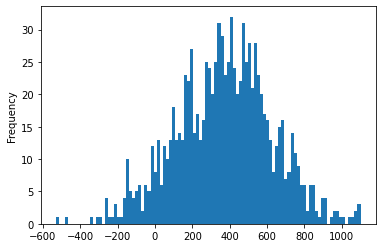

Средняя прибыль: 371.707
95% доверительный интервал: от -142.43 до 854.58
Вероятность убытков равна 7.7% и является больше допустимой. Регион стоит исключить из разработки.
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=



In [17]:
for n, lr in enumerate(lrs):
    get_resume_distr_income(get_distr_income(lr), n)

Вывод по результатам bootstrap:
    из всех регионов исходя из ТЗ лучше остановится на регионе №2 со средней прибылью 452.222. Остальные регионы не подходят под условия задачи.